<div align="center">
    
# Asset Finance Risk Assessment Model

## Data Cleaning and Analysis

> Author: [Mithamo Beth](https://github.com/Mythamor) 
</div>

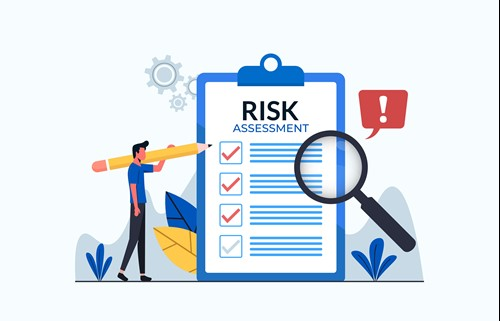 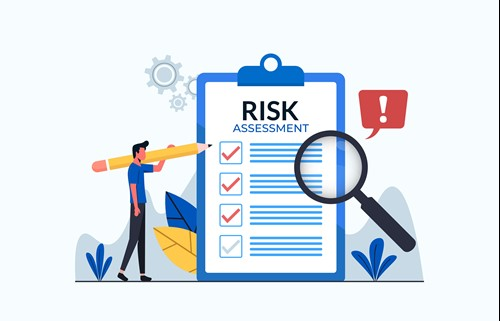
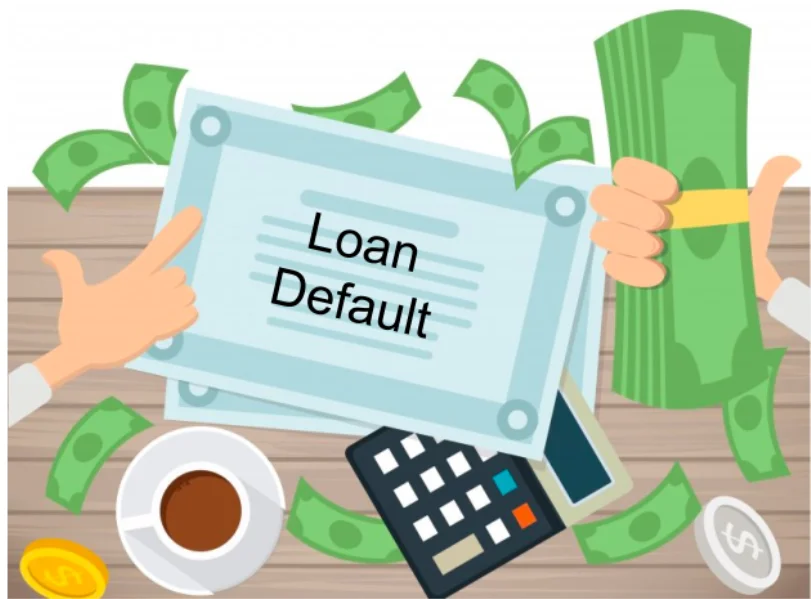

### Business Problem

In many third-world countries, individuals often struggle to access fair financing due to a lack of formal credit histories, resulting in exaggerated interest rates and predatory lending. These individuals are considered "unbanked," making traditional risk assessments difficult. Using a loan default dataset, this project aims to develop a risk assessment model that classifies users into low, medium, or high-risk categories based on the information they provide. By doing so, we can help lenders offer fairer interest rates while simultaneously suggesting a loan amount they might qualify for, thereby making financing more accessible and equitable for underserved populations.

## Data Understanding
This project uses Vehicle Loan dataset, which can be found in [vehicle_loans.csv](data/vehicle_loans.csv) in the data folder in this repo. The description of the column names can be found in [data_dictionary.csv](data/data_dictionary.csv)  in the same folder.

The vehicle_loans dataset has the following features which we will explore:


* `UNIQUEID - Identifier for customers`
* `DISBURSED_AMOUNT - Amount of Loan disbursed`
* `ASSET_COST - Cost of the Asset`
* `LTV - Loan to Value of the asset`
* `BRANCH_ID - Branch where the loan was disbursed`
* `SUPPLIER_ID - Vehicle Dealer where the loan was disbursed`
* `MANUFACTURER_ID - Vehicle manufacturer(Hero, Honda, TVS etc.)`
* `CURRENT_PINCODE_ID - Current pincode of the customer`
* `DATE_OF_BIRTH - Date of birth of the customer`
* `EMPLOYMENT_TYPE - Employment Type of the customer (Salaried/Self Employed)`
* `DISBURSAL_DATE - Date of disbursement`
* `STATE_ID - State of disbursement`
* `EMPLOYEE_CODE_ID - Employee of the organization who logged the disbursement`
* `MOBILENO_AVL_FLAG - If Mobile no. was shared by the customer then flagged as 1`
* `AADHAR_FLAG - Aadhaar is a 12 digit individual identification number which serves as proof of identity and proof of address for residents of India. 
If aadhar was shared by the customer then flagged as 1`
* `PAN_FLAG - Permanent Account Number or PAN is a means of identifying various taxpayers in the country. Pan Card is a 10-digit unique identification alphanumeric number (containing both alphabets and numbers) assigned to Indians, mostly to those who pay tax.  
If pan was shared by the customer then flagged as 1`
* `VOTERID_FLAG - If voter  was shared by the customer then flagged as 1`
* `DRIVING_FLAG - If driving license was shared by the customer then flagged as 1`
* `PASSPORT_FLAG - If passport was shared by the customer then flagged as 1`
* `PERFORM_CNS_SCORE - Bureau Score`
* `PERFORM_CNS_SCORE_DESCRIPTION - Bureau score description`
* `PRI_NO_OF_ACCTS - Count of total loans taken by the customer at the time of disbursement,Primary accounts are those which the customer has taken for his personal use`
* `PRI_ACTIVE_ACCTS - Count of active loans taken by the customer at the time of disbursement`
* `PRI_OVERDUE_ACCTS - Count of default accounts at the time of disbursement`
* `PRI_CURRENT_BALANCE - Total principal outstanding amount of the active loans at the time of disbursement`
* `PRI_SANCTIONED_AMOUNT - Total amount that was sanctioned for all the loans at the time of disbursement`
* `PRI_DISBURSED_AMOUNT - Total amount that was disbursed for all the loans at the time of disbursement`
* `SEC_NO_OF_ACCTS - Count of total loans taken by the customer at the time of disbursement,Secondary accounts are those which the customer act as a co-applicant or gaurantor`
* `SEC_ACTIVE_ACCTS - Count of active loans taken by the customer at the time of disbursement`
* `SEC_OVERDUE_ACCTS - Count of default accounts at the time of disbursement`
* `SEC_CURRENT_BALANCE - Total Principal outstanding amount of the active loans at the time of disbursement`
* `SEC_SANCTIONED_AMOUNT - Total amount that was sanctioned for all the loans at the time of disbursement`
* `SEC_DISBURSED_AMOUNT - Total amount that was disbursed for all the loans at the time of disbursement`
* `PRIMARY_INSTAL_AMT - EMI Amount of the primary loan`
* `SEC_INSTAL_AMT - EMI Amount of the secondary loan`
* `NEW_ACCTS_IN_LAST_SIX_MONTHS - New loans taken by the customer in last 6 months before the disbursment`
* `DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS - Loans defaulted in the last 6 months`
* `AVERAGE_ACCT_AGE - Average loan tenure`
* `CREDIT_HISTORY_LENGTH - Time since first loan`
* `NO_OF_INQUIRIES - Enquries done by the customer for loans`
* `LOAN_DEFAULT - Payment default in the first EMI on due date (0 or 1)`



##  Load and Clean Data

In [1]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import duckdb
import sweetviz as sv

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set the layout
sns.set_style("darkgrid");

# Set the color palette
sns.set_palette("Set2");

# Set the default figsize
plt.rcParams["figure.figsize"] = (8, 6);

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv("../data/vehicle_loans.csv", index_col = 'UNIQUEID')

# Capitalize column headers for neatness
df.columns = df.columns.str.capitalize()
df.head()

,Disbursed_amount,Asset_cost,Ltv,Branch_id,Supplier_id,Manufacturer_id,Current_pincode_id,Date_of_birth,Employment_type,Disbursal_date,...,Sec_sanctioned_amount,Sec_disbursed_amount,Primary_instal_amt,Sec_instal_amt,New_accts_in_last_six_months,Delinquent_accts_in_last_six_months,Average_acct_age,Credit_history_length,No_of_inquiries,Loan_default
UNIQUEID,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
# Investigate the dataset
print(f'The shape of the dataset is: {df.shape}\n')
df.info()

The shape of the dataset is: (233154, 40)

<class 'pandas.core.frame.DataFrame'>
Index: 233154 entries, 420825 to 630213
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Disbursed_amount                     233154 non-null  int64  
 1   Asset_cost                           233154 non-null  int64  
 2   Ltv                                  233154 non-null  float64
 3   Branch_id                            233154 non-null  int64  
 4   Supplier_id                          233154 non-null  int64  
 5   Manufacturer_id                      233154 non-null  int64  
 6   Current_pincode_id                   233154 non-null  int64  
 7   Date_of_birth                        233154 non-null  object 
 8   Employment_type                      225493 non-null  object 
 9   Disbursal_date                       233154 non-null  object 
 10  State_id                             

In [4]:
# Check for missing values
df.isnull().sum()

Disbursed_amount                          0
Asset_cost                                0
Ltv                                       0
Branch_id                                 0
Supplier_id                               0
Manufacturer_id                           0
Current_pincode_id                        0
Date_of_birth                             0
Employment_type                        7661
Disbursal_date                            0
State_id                                  0
Employee_code_id                          0
Mobileno_avl_flag                         0
Aadhar_flag                               0
Pan_flag                                  0
Voterid_flag                              0
Driving_flag                              0
Passport_flag                             0
Perform_cns_score                         0
Perform_cns_score_description             0
Pri_no_of_accts                           0
Pri_active_accts                          0
Pri_overdue_accts               

> Employment type is the only column with missing values

Null values: 0

Distribution of employment type is Employment_type
Self employed    0.547428
Salaried         0.419714
Missing          0.032858
Name: proportion, dtype: float64


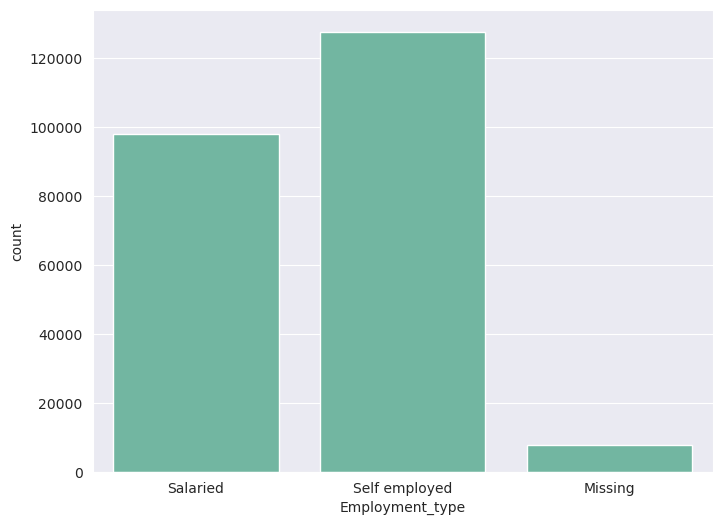

In [5]:
# Fill missing values with a missing placeholder
df = df.fillna(value={'Employment_type' : 'Missing'})

# Check for null values on the employment column again
print(f'Null values:', df.Employment_type.isna().sum())
print()
# Plot employment type 
print(f"Distribution of employment type is {df['Employment_type'].value_counts(normalize=True)}")
sns.countplot(x="Employment_type", data=df)
plt.show()

> 54% of the borrowers are self employed

* The self employed borrowers have the highest default rate. 
* Most of the borrowers are self employed
* The default rate of the missing class is only 3% whereas the self employed is 57%.

In [6]:
# Investigate the rate of default based on the employment type
print(df.groupby('Employment_type')['Loan_default'].value_counts().unstack(level=1))
print()
print(df.groupby('Loan_default')['Employment_type'].value_counts(normalize=True).unstack(level=1))

Loan_default         0      1
Employment_type              
Missing           6017   1644
Salaried         77948  19910
Self employed    98578  29057

Employment_type   Missing  Salaried  Self employed
Loan_default                                      
0                0.032962  0.427012       0.540026
1                0.032483  0.393393       0.574124


In [7]:
# Describe the continuous variables 
print(f'\n Statsof ltv:\n {df.Ltv.describe()}')
print(f'\n Stats of disbursed amount:\n{df.Disbursed_amount.describe()}')
print(f'\n Stats of asset cost:\n{df.Asset_cost.describe()}')


 Statsof ltv:
 count    233154.000000
mean         74.746530
std          11.456636
min          10.030000
25%          68.880000
50%          76.800000
75%          83.670000
max          95.000000
Name: Ltv, dtype: float64

 Stats of disbursed amount:
count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: Disbursed_amount, dtype: float64

 Stats of asset cost:
count    2.331540e+05
mean     7.586507e+04
std      1.894478e+04
min      3.700000e+04
25%      6.571700e+04
50%      7.094600e+04
75%      7.920175e+04
max      1.628992e+06
Name: Asset_cost, dtype: float64


In [8]:
print(f"Borrowers with a LTV equal to or greater than 75% : {round(len(df[df['Ltv'] >= 75]) / len (df), 2)}")
print(f"Borrowers with a LTV of less than 75% : {round(len(df[df['Ltv'] < 75]) / len (df), 2)}")

Borrowers with a LTV equal to or greater than 75% : 0.55
Borrowers with a LTV of less than 75% : 0.45


In [9]:
# Check the percentage of the dataset where Pri/Sec sanctioned amount == disbursed amount
# Primary accounts
Pri_eq = df.loc[df['Pri_sanctioned_amount'] == df['Pri_disbursed_amount']]
print(f'Primary sanctioned amounts == disbursed amount is {round(len(Pri_eq)/len(df),3)}, of the entire dataset')

# Secondary accounts
Sec_eq = df.loc[df['Sec_sanctioned_amount'] == df['Sec_disbursed_amount']]
print(f'Secondary sanctioned amounts == disbursed amount is {round(len(Sec_eq)/len(df),3)}, of the entire dataset') 

Primary sanctioned amounts == disbursed amount is 0.942, of the entire dataset
Secondary sanctioned amounts == disbursed amount is 0.997, of the entire dataset


In [10]:
# Check for the relevance of the secondary accounts
# Their descriptive power

print(len(df.loc[df['Sec_no_of_accts'] == 0])/len(df))
print(len(df.loc[df['Sec_active_accts'] == 0])/len(df))
print(len(df.loc[df['Sec_overdue_accts'] == 0])/len(df))
print(len(df.loc[df['Sec_current_balance'] == 0])/len(df))
print(len(df.loc[df['Sec_sanctioned_amount'] == 0])/len(df))
print(len(df.loc[df['Sec_disbursed_amount'] == 0])/len(df))
print(len(df.loc[df['Sec_instal_amt'] == 0])/len(df))

0.9748449522633109
0.9836288461703423
0.9942655926983882
0.9855717680159894
0.9839762560367825
0.98411350437908
0.9904912632852106


> 99% of all the columns with Secondary information have zero as their input. We will therefore drop all the secondary columns, as they do not provide any information that benefit our model, or analysis

In [11]:
# The sanctioned columns will not much provide predictive power
# Drop the sanctioned columns
df = df.drop(['Pri_sanctioned_amount',
              'Sec_sanctioned_amount',
              'Sec_no_of_accts',                                
              'Sec_active_accts',                               
              'Sec_overdue_accts',                               
              'Sec_current_balance',                           
              'Sec_sanctioned_amount',                           
              'Sec_disbursed_amount',                           
              'Primary_instal_amt',                              
              'Sec_instal_amt'], axis=1)
# Shape of the new dataframe
df.shape

(233154, 31)

In [12]:
# Investigate the object data types
object_columns = df.select_dtypes('object')
object_columns.head()

,Date_of_birth,Employment_type,Disbursal_date,Perform_cns_score_description,Average_acct_age,Credit_history_length
UNIQUEID,,,,,,
420825,01-01-1984,Salaried,03-08-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon
537409,31-07-1985,Self employed,26-09-2018,I-Medium Risk,1yrs 11mon,1yrs 11mon
417566,24-08-1985,Self employed,01-08-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon
624493,30-12-1993,Self employed,26-10-2018,L-Very High Risk,0yrs 8mon,1yrs 3mon
539055,09-12-1977,Self employed,26-09-2018,No Bureau History Available,0yrs 0mon,0yrs 0mon


> The Date_of_birth, Disbursal_date, Average_acct_age, and Credit_history_length should be converted to datetime dtypes

In [13]:
# Object to datetime
df['Date_of_birth'] = pd.to_datetime(df['Date_of_birth'], dayfirst=True)
df['Disbursal_date'] = pd.to_datetime(df['Disbursal_date'], dayfirst=True)

# Extract number of months from Average_acct_age with both months and years, and create a new column
def calc_months(str_list):  
    years = int(str_list[0])
    months = int(str_list[1])

    num_months = (years * 12) + months
    return num_months

df['Average_loan_tenure'] = df['Average_acct_age'].str.findall('\d+')

df['Average_loan_tenure'] = df['Average_loan_tenure'].map(calc_months)

# Extract number of months from Credit history length with both months and years, and create a new column
def convert_str_to_months(col_name):
    new_col = col_name + '_months'
    df[new_col] = df[col_name].str.findall('\d+')
    df[new_col] = df[new_col].map(calc_months)
    
convert_str_to_months('Credit_history_length')

#drop the Average_acct_age, Credit_history_length
df = df.drop(columns=['Average_acct_age', 'Credit_history_length'], axis=1)

#inspect the new df
df[['Date_of_birth', 'Disbursal_date', 'Credit_history_length_months', 'Average_loan_tenure']].sample(n=5)

,Date_of_birth,Disbursal_date,Credit_history_length_months,Average_loan_tenure
UNIQUEID,,,,
539456,1980-06-06,2018-09-26,91,18
599562,1985-07-05,2018-10-22,5,5
647855,1985-04-09,2018-10-31,0,0
526892,1994-04-22,2018-09-21,0,0
443991,1974-12-14,2018-08-17,23,12


In [14]:
#  Statistics of average loan tenure and credit history length
df[['Credit_history_length_months', 'Average_loan_tenure']].describe()

,Credit_history_length_months,Average_loan_tenure
count,233154.000000,233154.000000
mean,16.252404,8.915764
std,28.581255,15.106416
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,24.000000,13.000000
max,468.000000,369.000000


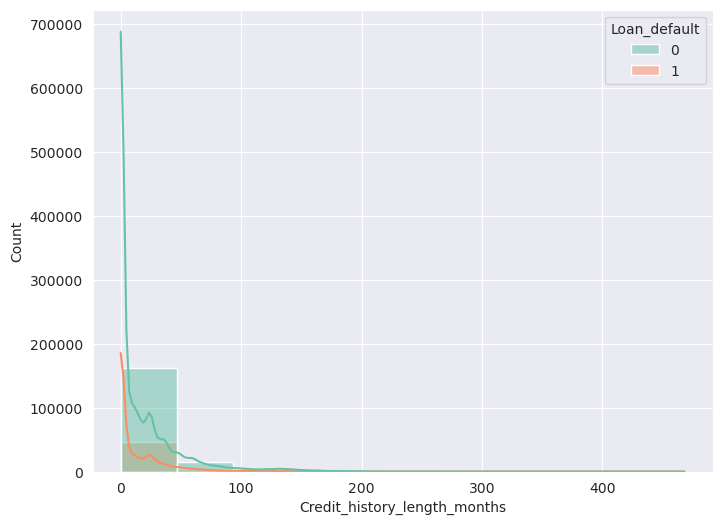

In [22]:
sns.histplot(data=df, x='Credit_history_length_months', bins=10, kde=True, hue='Loan_default');
plt.show()

> The avearge credit history month is 16 months and 15 for loan tenure. The max for both seem to be outliers 

### Loan Default Exploration

In [16]:
# Explore the target variable
df.Loan_default.value_counts(normalize=True)

Loan_default
0    0.782929
1    0.217071
Name: proportion, dtype: float64

> The default rate is 21%. There is class imbalance between the default and non-default rates.

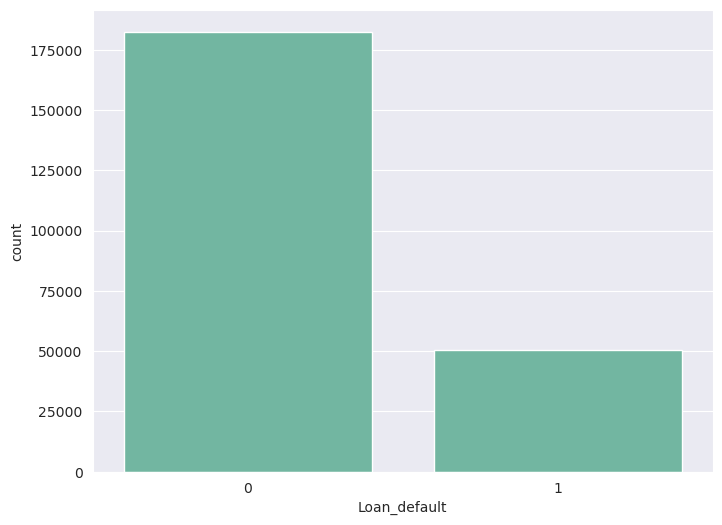

In [17]:
# Visualize the target variable
sns.countplot(x="Loan_default", data=df)
plt.show()

### Check for outliers

In [18]:
"""
# Outliers using z_scores
from scipy import stats

outliers = pd.DataFrame()
numeric_columns = df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    z_scores = np.abs(stats.zscore(df[column]))
    outliers_zscore = df[z_scores > 5]
    outliers = pd.concat([outliers, outliers_zscore])

outliers.shape"""

'\n# Outliers using z_scores\nfrom scipy import stats\n\noutliers = pd.DataFrame()\nnumeric_columns = df.select_dtypes(include=np.number).columns  # Select only numeric columns\nfor column in numeric_columns:\n    z_scores = np.abs(stats.zscore(df[column]))\n    outliers_zscore = df[z_scores > 5]\n    outliers = pd.concat([outliers, outliers_zscore])\n\noutliers.shape'

## Exploratory Data Analysis

### Financial Analysis

In this section, we will explore financial metrics, to better understand the dataset. We will explore the Disbursal Amount, Asset Cost, LTV, CNS_Scores

In [57]:
# Assess cns performance distribution
df.Perform_cns_score_description.value_counts(normalize=True)

Perform_cns_score_description
No Bureau History Available                                0.501600
C-Very Low Risk                                            0.068817
A-Very Low Risk                                            0.060578
D-Very Low Risk                                            0.048715
B-Very Low Risk                                            0.039463
M-Very High Risk                                           0.037640
F-Low Risk                                                 0.036392
K-High Risk                                                0.035500
H-Medium Risk                                              0.029401
E-Low Risk                                                 0.024966
I-Medium Risk                                              0.023834
G-Low Risk                                                 0.017105
Not Scored: Sufficient History Not Available               0.016148
J-High Risk                                                0.016075
Not Scored: Not En

In [19]:
# Assess the loan default based on the cns performance
df.groupby('Loan_default').Perform_cns_score_description.value_counts(normalize=True)

Loan_default  Perform_cns_score_description                          
0             No Bureau History Available                                0.492476
              C-Very Low Risk                                            0.072723
              A-Very Low Risk                                            0.064549
              D-Very Low Risk                                            0.052914
              B-Very Low Risk                                            0.043787
              F-Low Risk                                                 0.037827
              M-Very High Risk                                           0.033433
              K-High Risk                                                0.032732
              H-Medium Risk                                              0.028470
              E-Low Risk                                                 0.026410
              I-Medium Risk                                              0.022143
              G-Low Risk    

In [23]:
"""
# Function that bins the number of cns_description categories
def assign_category(category):
    if 'Low' in category:
        return 'Low_risk'
    elif 'Medium' in category:
        return 'Medium_risk'
    elif 'High' in category:
        return 'High_risk'
    elif 'No Bureau History Available' in category:
        return 'Medium_high_risk'
    else:
        return 'Very_high_risk'

# create a new column
df['Cns_score_category'] = df['Perform_cns_score_description'].apply(assign_category)

print(df.Cns_score_category.value_counts(normalize=True))

#Drop description column
df = df.drop('Perform_cns_score_description', axis=1)

#visualize the data
sns.countplot(data=df, x=df.Cns_score_category.values);
"""

"\n# Function that bins the number of cns_description categories\ndef assign_category(category):\n    if 'Low' in category:\n        return 'Low_risk'\n    elif 'Medium' in category:\n        return 'Medium_risk'\n    elif 'High' in category:\n        return 'High_risk'\n    elif 'No Bureau History Available' in category:\n        return 'Medium_high_risk'\n    else:\n        return 'Very_high_risk'\n\n# create a new column\ndf['Cns_score_category'] = df['Perform_cns_score_description'].apply(assign_category)\n\nprint(df.Cns_score_category.value_counts(normalize=True))\n\n#Drop description column\ndf = df.drop('Perform_cns_score_description', axis=1)\n\n#visualize the data\nsns.countplot(data=df, x=df.Cns_score_category.values);\n"

> At least 50% of the borrowers, have no credit history. 29% are considered low risk. 

In [ ]:
# The average rate of loan default per category
#df.groupby('Cns_score_category')['Loan_default'].mean().sort_values(ascending=False)

In [24]:
# Assess the top 10 most frequent cns_scores
df.Perform_cns_score.value_counts(normalize=True).head(10)

Perform_cns_score
0      0.501600
300    0.037640
738    0.037151
825    0.031709
15     0.016148
17     0.015749
763    0.012979
16     0.012374
708    0.009024
737    0.008531
Name: proportion, dtype: float64

> 50% of the borrowers have a cns_score of 0. The company therefore does not heavily rely on the cns scores when disbursing loans.

### According to India's credit bureau 
> 750 - 900 
This shows that you have an exemplary credit history.
It is easier for you to get a home loan, personal loan, credit cards and other unsecured loans with a credit score within this range.
It also means that you have a consistency of frequent and timely repayments.

> 700 - 750	
If you have a CIBIL score within this range, it means that you have a great track record of making repayments on time.
However, the banks will conduct some more credit analysis and this will be based on their internal credit policies.

> 550 - 700	
This would mean that you have a few irregularities with your past payments.
Banks may think that it is a little risky to give you a loan.
A few banks may consider you eligible for a loan but they will ask for a high collateral and interest rate.

> 300 - 550	
This means that you have a lot of defaults like past delinquencies, write offs, and also, over leverage. You will find it difficult to get a loan.

In [25]:
# Create a flag for borrowers with a credit score higher than 550
from sklearn.preprocessing import FunctionTransformer

def average_credit(data):
    """
    Helper function that returns 1 if average, 0 if lower than avearge
    """
    return  (data > 550).astype(int)

# Instantiate transformer
func_transformer = FunctionTransformer(average_credit, validate=False)

# Create transformed column
_average_credit = func_transformer.fit_transform(df['Perform_cns_score'])

_average_credit.value_counts(normalize=True)

Perform_cns_score
0    0.642404
1    0.357596
Name: proportion, dtype: float64

> 64% of the borrowers have a credit score lower than 550, while only 35% of the borrowers have a credit score higher than 550.

In [26]:
# Explore the number of inquiries
df.No_of_inquiries.value_counts(normalize=True).head()

No_of_inquiries
0    0.866213
1    0.095581
2    0.023199
3    0.007579
4    0.003260
Name: proportion, dtype: float64

In [27]:
"""87% of the borrowers made 0 inquiries, while 9% of the borrowers made only 1 inquiry. Inquiries greater than 1 therefore \
account for less than 5% of the entire dataset"""

'87% of the borrowers made 0 inquiries, while 9% of the borrowers made only 1 inquiry. Inquiries greater than 1 therefore account for less than 5% of the entire dataset'

In [28]:
# Avearge default rate per number of inquiries
df.groupby('No_of_inquiries')['Loan_default'].mean().sort_values(ascending=False)

No_of_inquiries
13    0.666667
15    0.571429
18    0.500000
11    0.466667
8     0.419048
7     0.407407
5     0.381924
6     0.380753
19    0.333333
10    0.323529
9     0.318182
4     0.307895
3     0.292586
12    0.285714
2     0.275652
14    0.250000
1     0.244155
0     0.210719
17    0.000000
16    0.000000
20    0.000000
22    0.000000
23    0.000000
28    0.000000
36    0.000000
Name: Loan_default, dtype: float64

In [29]:
"The higher the number of inquiries, the higher the default rate. Given the above statistics, borrowers with 0/1\
inquiries had the least default rate. The company should therefore flag more than 3 inquiries, as the rate of \
default increases drastically. The values with 0 default are outliers "

'The higher the number of inquiries, the higher the default rate. Given the above statistics, borrowers with 0/1inquiries had the least default rate. The company should therefore flag more than 3 inquiries, as the rate of default increases drastically. The values with 0 default are outliers '

In [30]:
# Bin the no_of_inquiries
def inquiries(category):
    if category == 0:
        return '0'
    elif category == 1:
        return '1'
    elif category == 2:
        return '2'
    else:
        return '3+'
    
df['No_of_inquiries'] = df['No_of_inquiries'].apply(inquiries).astype('category')
print(df.No_of_inquiries.value_counts(normalize=True))

#visualize the data
sns.countplot(data=df, x=df.No_of_inquiries.values);       

No_of_inquiries
0     0.866213
1     0.095581
2     0.023199
3+    0.015007
Name: proportion, dtype: float64


In [31]:
# Check for the relationship between the loan tenure and the length of credit history
sns.scatterplot(data=df, y='Average_loan_tenure', x='Credit_history_length_months',hue='Loan_default');

In [32]:
# Investigate unique values in the ID columns
for column in df.columns:
    if 'ID' in column.upper():
        print(column, df[column].nunique())

Branch_id 82
Supplier_id 2953
Manufacturer_id 11
Current_pincode_id 6698
State_id 22
Employee_code_id 3270
Voterid_flag 2


In [33]:
# Top 5 average loan defaults per id
for column in df.columns:
    if 'ID' in column.upper():
        print(df.groupby(column)['Loan_default'].mean().sort_values(ascending=False).head())
        print()

Branch_id
251    0.343913
254    0.324308
97     0.313625
36     0.296762
78     0.291476
Name: Loan_default, dtype: float64

Supplier_id
15045    1.0
24109    1.0
23685    1.0
23741    1.0
18513    1.0
Name: Loan_default, dtype: float64

Manufacturer_id
153    0.333333
48     0.272531
45     0.228499
120    0.220750
49     0.218787
Name: Loan_default, dtype: float64

Current_pincode_id
3070    1.0
4522    1.0
4682    1.0
4567    1.0
4556    1.0
Name: Loan_default, dtype: float64

State_id
13    0.306587
14    0.275866
2     0.271394
12    0.265558
17    0.245803
Name: Loan_default, dtype: float64

Employee_code_id
3795    1.0
3771    1.0
350     1.0
3685    1.0
3101    1.0
Name: Loan_default, dtype: float64

Voterid_flag
1    0.260875
0    0.209646
Name: Loan_default, dtype: float64



In [34]:
# Number of Manufacturers
print(f'No of Manufacturers: {df.Manufacturer_id.nunique()}\n')

# States with the highest number of borrowers/ disbursed loans
print(f'Manufacturers with highest Loan disbursal \n{df.Manufacturer_id.value_counts(normalize=True).sort_values(ascending=False).head()}\n')

# States with the lowest number of borrowers/ disbursed loans
print(f'Manufacturers with lowest Loan disbursal \n{df.Manufacturer_id.value_counts(normalize=True).sort_values(ascending=False).tail()}')

No of Manufacturers: 11

Manufacturers with highest Loan disbursal 
Manufacturer_id
86    0.469792
45    0.242870
51    0.116678
48    0.071669
49    0.043834
Name: proportion, dtype: float64

Manufacturers with lowest Loan disbursal 
Manufacturer_id
67     0.010315
145    0.003337
153    0.000051
152    0.000026
156    0.000004
Name: proportion, dtype: float64


In [35]:
# Plot the manufacturer's count plot
sns.countplot(data=df, x='Manufacturer_id', hue= 'Loan_default');
plt.title("Manufaturers loan_default rate");

In [36]:
# Visualize the number of loans per state
sns.countplot(data=df, x='State_id');
plt.title("Number of loans per state")

Text(0.5, 1.0, 'Number of loans per state')

In [37]:
# Id fields with large numbers of unique values will introduce complexity into our predictive model. 
# Therefore, we will drop them from the dataset. 
df = df.drop(columns=['Branch_id', 'Supplier_id', 'Current_pincode_id', 'Employee_code_id'], axis=1)
df.shape

(233154, 27)

In [38]:
# Assess the relationship between flag columns and loan default
from scipy.stats import chi2_contingency
flags = df[['Mobileno_avl_flag',
            'Aadhar_flag',
            'Pan_flag',
            'Voterid_flag',
            'Driving_flag', 
            'Passport_flag']]


# Iterate over each categorical feature
for feature in flags:
    # Create a contingency table of the feature and target variable
    contingency_table = pd.crosstab(df[feature], df['Loan_default'])
    
    # Perform chi-square test of independence
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results
    print("Feature:", feature)
    print("Chi-square statistic:", chi2)
    print("P-value:", p_value)
    print()

Feature: Mobileno_avl_flag
Chi-square statistic: 0.0
P-value: 1.0

Feature: Aadhar_flag
Chi-square statistic: 403.0748379341479
P-value: 1.1791998402218374e-89

Feature: Pan_flag
Chi-square statistic: 0.957671117865875
P-value: 0.3277743362589148

Feature: Voterid_flag
Chi-square statistic: 445.90884255981064
P-value: 5.603683381655361e-99

Feature: Driving_flag
Chi-square statistic: 7.808087835127649
P-value: 0.0052012912081583085

Feature: Passport_flag
Chi-square statistic: 13.077913022819462
P-value: 0.0002987981770071958



> **Business Insight:**
>> Understanding whether having an ID like Aadhar or Voter ID impacts loan default rates can provide insight into the risk profile of borrowers, especially when dealing with unbanked or undocumented populations. It might show that individuals without certain government IDs are more likely to default, which could guide policy or lending decisions.



>  Based on the chi-square test results, the 'Aadhar_flag' and 'Voterid_flag' features show strong evidence of a significant relationship with the 'Loan_default' target variable. However, the 'Driving_flag', 'Passport_flag', 'Mobileno_avl_flag' and 'Pan_flag' features do not show significant evidence of a relationship with the 'Loan_default' target variable.

In [39]:
# Based on domain knowlegde, we will drop the flags with low predictive power
df = df.drop(columns=['Mobileno_avl_flag',
                      'Pan_flag',
                      'Driving_flag',
                      'Passport_flag'
                     ], axis=1)
df.shape

(233154, 23)

In [41]:
# H0 - No diffrence in means of the disbursed amount between the loans defaulted and the non-defaults
# H1 - There is a significant difference in means between the disbursed amounts in the loans defaulted and non-defaults
# Parametric Test - Independent t-test
from scipy import stats

default_group = df[df['Loan_default'] == 1]['Disbursed_amount']
non_default_group = df[df['Loan_default'] == 0]['Disbursed_amount']
t_statistic, p_value = stats.ttest_ind(default_group, non_default_group)
print("Independent t-test results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Independent t-test results:
T-Statistic: 37.619628356735696
P-Value: 8.74561717585509e-309


 A very low p-value suggests strong evidence against the null hypothesis and indicates a significant difference between the groups. the p-value is extremely small (close to zero), indicating a highly significant difference between the default and non-default groups in terms of the 'DISBURSED_AMOUNT' variable.

In [42]:
# Independent ttest

default_group = df[df['Loan_default'] == 1]['Asset_cost']
non_default_group = df[df['Loan_default'] == 0]['Asset_cost']
t_statistic, p_value = stats.ttest_ind(default_group, non_default_group)
print("Independent t-test results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Independent t-test results:
T-Statistic: 6.886906209368185
P-Value: 5.716223071536896e-12


In [43]:
# Filter the DataFrame for the desired categories in 'Employment_type'
categories = ['Salaried', 'Self Employed']
filtered_df = df[df['Employment_type'].isin(categories)]

# Create a contingency table of the filtered data for 'Employment_type' and 'Loan_default'
contingency_table = pd.crosstab(filtered_df['Employment_type'], filtered_df['Loan_default'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square test results:
Chi-square statistic: 0.0
P-value: 1.0


chi-square statistic is 0.0 and the p-value is 1.0, it suggests that there is no significant association between the categories 'Salaried' and 'Self Employed' in the 'Employment_type' variable and the 'Loan_default' variable. In other words, the default rates are not significantly different between these two employment types.

Based on the provided results, some variables have very low p-values (e.g., Disbursed_amount, Ltv, Employment_type), indicating a potentially significant association with loan default. Conversely, variables with higher p-values (e.g., Sec_overdue_accts, Driving_flag) may have weaker associations with loan default.

In [44]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plotting grid (subplots)
plt.figure(figsize=(15, len(numeric_columns) * 5))

# Loop through each numeric column and plot its distribution
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 3, i)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}', fontsize=14)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a2371d69800> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [49]:
df['Pri_no_of_accts'].value_counts(normalize=True).head(10)

Pri_no_of_accts
0    0.501600
1    0.150021
2    0.084854
3    0.055821
4    0.039986
5    0.030975
6    0.023834
7    0.018919
8    0.015312
9    0.012370
Name: proportion, dtype: float64

In [50]:
df['Pri_active_accts'].value_counts(normalize=True).head(10)

Pri_active_accts
0    0.587663
1    0.180374
2    0.092424
3    0.052618
4    0.031996
5    0.019481
6    0.011958
7    0.007699
8    0.005155
9    0.003242
Name: proportion, dtype: float64

In [51]:
df['Pri_current_balance'].value_counts().head(10)

Pri_current_balance
0         141696
800          121
400          119
30000        100
50000         84
100000        83
40000         77
25000         73
20000         66
60000         61
Name: count, dtype: int64

In [52]:
df['New_accts_in_last_six_months'].value_counts(normalize=True).head(10)

New_accts_in_last_six_months
0    0.778430
1    0.137673
2    0.047243
3    0.019120
4    0.008394
5    0.004135
6    0.002059
7    0.001295
8    0.000630
9    0.000339
Name: proportion, dtype: float64

In [53]:
df.columns

Index(['Disbursed_amount', 'Asset_cost', 'Ltv', 'Manufacturer_id',
       'Date_of_birth', 'Employment_type', 'Disbursal_date', 'State_id',
       'Aadhar_flag', 'Voterid_flag', 'Perform_cns_score',
       'Perform_cns_score_description', 'Pri_no_of_accts', 'Pri_active_accts',
       'Pri_overdue_accts', 'Pri_current_balance', 'Pri_disbursed_amount',
       'New_accts_in_last_six_months', 'Delinquent_accts_in_last_six_months',
       'No_of_inquiries', 'Loan_default', 'Average_loan_tenure',
       'Credit_history_length_months'],
      dtype='object')

In [54]:
# Subset the features we will use for modeling risk assessment
assessment_df = df[[
                    'Disbursed_amount', 'Asset_cost', 'Ltv', 'Manufacturer_id',
                    'Date_of_birth', 'Employment_type', 'Disbursal_date', 'State_id',
                   'Aadhar_flag', 'Voterid_flag', 'Perform_cns_score', 'Perform_cns_score_description', 
                    'Pri_no_of_accts', 'Pri_active_accts', 'New_accts_in_last_six_months', 'No_of_inquiries',
                   'Loan_default', 'Average_loan_tenure', 'Credit_history_length_months',
                   
                   ]]
assessment_df.head()

,Disbursed_amount,Asset_cost,Ltv,Manufacturer_id,Date_of_birth,Employment_type,Disbursal_date,State_id,Aadhar_flag,Voterid_flag,Perform_cns_score,Perform_cns_score_description,Pri_no_of_accts,Pri_active_accts,New_accts_in_last_six_months,No_of_inquiries,Loan_default,Average_loan_tenure,Credit_history_length_months
UNIQUEID,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,45,1984-01-01,Salaried,2018-08-03,6,1,0,0,No Bureau History Available,0,0,0,0,0,0,0
537409,47145,65550,73.23,45,1985-07-31,Self employed,2018-09-26,6,1,0,598,I-Medium Risk,1,1,0,0,1,23,23
417566,53278,61360,89.63,45,1985-08-24,Self employed,2018-08-01,6,1,0,0,No Bureau History Available,0,0,0,0,0,0,0
624493,57513,66113,88.48,45,1993-12-30,Self employed,2018-10-26,6,1,0,305,L-Very High Risk,3,0,0,1,1,8,15
539055,52378,60300,88.39,45,1977-12-09,Self employed,2018-09-26,6,1,0,0,No Bureau History Available,0,0,0,1,1,0,0


In [55]:
# export to csv
assessment_df.to_csv('../data/assessment.csv')